In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import navco
import pandas as pd
import subprocess

# Install xlrd and openpyxl packages using pip
subprocess.call(['pip', 'install', 'xlrd', 'openpyxl'])



0

In [7]:
navco = pd.read_excel("/content/NAVCO2-1_ForPublication.xls")
navco.head()

,camp_name,id,year,campyearid,location,target,loc_iso,loc_cow,loc_vdem,territory,...,reliability,coding_notes,ra_initials,tccode,lccode,start_date_obsolete,end_date_obsolete,success,progress,outcomes_refs
0,Active Forces,1,1991,1_1991,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,http://www.iss.org.za/pubs/papers/89/Paper89.h...,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
1,Active Forces,1,1992,1_1992,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,Reuters lba0000020011123dobp03sm6 ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
2,Active Forces,1,1993,1_1993,Madagascar,Didier Radsiraka,450.0,580.0,125.0,NaN,...,2.0,Reuters lba0000020011120dp6o06zif ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,1,4,NaN
3,Afar insurgency,2,1991,2_1991,Djibouti,Djibouti regime,262.0,522.0,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,1,FRUD was able to take over large areas of the ...
4,Afar insurgency,2,1992,2_1992,Djibouti,Djibouti regime,262.0,522.0,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,2,"DJIBOUTI Human Rights Practices, 1992: Departm..."


In [5]:
# import F&L
FnL= pd.read_excel("/content/f&l.xlsx")
FnL.head()

,ccode,country,cname,cmark,year,wars,war,warl,onset,ethonset,...,empolity2l,sdwars,sdonset,colwars,colonset,cowwars,cowonset,cowwarl,sdwarl,colwarl
0,2,USA,USA,1,1945,0,0,0,0,0,...,7.68712,0,0,NaN,NaN,0.0,0.0,0.0,0,NaN
1,2,USA,USA,0,1946,0,0,0,0,0,...,10.00000,0,0,NaN,NaN,0.0,0.0,0.0,0,NaN
2,2,USA,USA,0,1947,0,0,0,0,0,...,10.00000,0,0,NaN,NaN,0.0,0.0,0.0,0,NaN
3,2,USA,USA,0,1948,0,0,0,0,0,...,10.00000,0,0,NaN,NaN,0.0,0.0,0.0,0,NaN
4,2,USA,USA,0,1949,0,0,0,0,0,...,10.00000,0,0,NaN,NaN,0.0,0.0,0.0,0,NaN


In [8]:
#Rename so variables match
navco['cow'] = navco["loc_cow"]
FnL['cow'] = FnL["ccode"]

In [10]:
column_names = navco.columns

# Now, you can print the column names
print(column_names)

Index(['camp_name', 'id', 'year', 'campyearid', 'location', 'target',

       'loc_iso', 'loc_cow', 'loc_vdem', 'territory',

       ...

       'coding_notes', 'ra_initials', 'tccode', 'lccode',

       'start_date_obsolete', 'end_date_obsolete', 'success', 'progress',

       'outcomes_refs', 'cow'],

      dtype='object', length=143)


In [11]:
# subset variables for merging: navco
navco1=navco[['cow', 'year', 'prim_meth', 'camp_goals', 'div_gender', 'div_age', 'div_class', 'div_urban_rural', 'div_ideology', 'div_party', 'div_regional', 'div_ethnicity', 'div_religion', 'repression', 'camp_support', 'ingo_support', 'dias_support']]
navco1

,cow,year,prim_meth,camp_goals,div_gender,div_age,div_class,div_urban_rural,div_ideology,div_party,div_regional,div_ethnicity,div_religion,repression,camp_support,ingo_support,dias_support
0,580.0,1991,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0
1,580.0,1992,1,0,0,0,0,1,0,1,0,0,0,3,0,0,0
2,580.0,1993,1,0,0,0,0,1,0,1,0,0,0,3,0,0,0
3,522.0,1991,0,0,0,1,1,1,1,0,1,0,0,3,0,1,1
4,522.0,1992,0,0,0,1,1,1,1,1,1,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,483.0,2008,0,0,0,0,0,0,0,0,1,1,0,3,1,0,1
2713,483.0,2009,0,0,0,0,0,0,0,0,1,1,0,3,1,0,1
2714,483.0,2010,0,0,0,0,0,0,0,0,1,1,0,3,0,0,1
2715,372.0,2008,0,3,0,0,0,0,0,0,0,0,0,3,1,0,0


In [12]:
# subset variables for merging: FnL

FnL1=FnL[[
    "cow","year", "durest","ethwar","pop",
    "ethfrac", "relfrac"
]]

In [13]:
# left join:  we will work with this dataset

left= pd.merge(navco1, FnL1, on=['cow', 'year'], how='left')
left.shape

(2717, 22)

In [14]:
# given data availablity, we will focus on 1981-2013
conflict= left[(left['year'] > 1945) & (left['year'] < 1991)]

In [15]:
# create target variables

conflict['violent'] = conflict['prim_meth']
conflict['violent'] = conflict['violent'].fillna(0)

conflict['nonviolent'] = 1 - conflict['prim_meth']
conflict['nonviolent'] = conflict['nonviolent'].fillna(0)

conflict['conflict'] = conflict['prim_meth'].notnull().astype(int)





<ipython-input-15-b93e94ca396a>:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  conflict['violent'] = conflict['prim_meth']

<ipython-input-15-b93e94ca396a>:4: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  conflict['violent'] = conflict['violent'].fillna(0)

<ipython-input-15-b93e94ca396a>:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.p

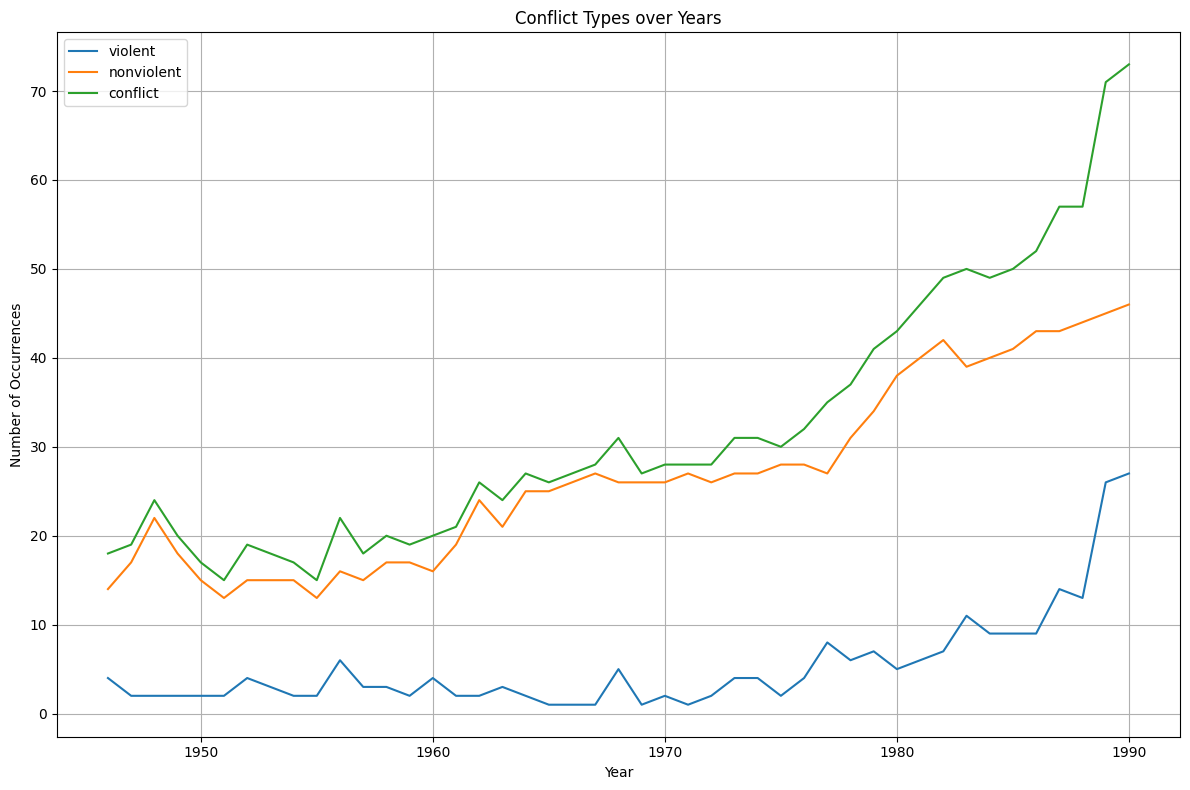

In [16]:
# Plot different types of conflicts over years

import matplotlib.pyplot as plt

# Group data by 'year' and sum up all "1"s for each variable
annual_counts = conflict.groupby('year')[['violent', 'nonviolent', 'conflict']].sum()

# Plot
plt.figure(figsize=(12, 8))
for column in annual_counts.columns:
    plt.plot(annual_counts.index, annual_counts[column], label=column)

plt.title('Conflict Types over Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
### let's explore missing observations

na_count = conflict.isnull().sum()
na_sorted = na_count.sort_values(ascending=False)
na_sorted

ethwar             1349
durest             1349
pop                 296
relfrac             294
ethfrac             294
cow                  50
repression            0
nonviolent            0
violent               0
dias_support          0
ingo_support          0
camp_support          0
div_religion          0
year                  0
div_ethnicity         0
div_regional          0
div_party             0
div_ideology          0
div_urban_rural       0
div_class             0
div_age               0
div_gender            0
camp_goals            0
prim_meth             0
conflict              0
dtype: int64

In [18]:
# drop all rows where there are NA's in pop, relfrac, or ethfrac

conflict = conflict.dropna(subset=['pop', 'relfrac', 'ethfrac'])


In [ ]:
conflict

,cow,year,prim_meth,camp_goals,div_gender,div_age,div_class,div_urban_rural,div_ideology,div_party,...,ingo_support,dias_support,durest,ethwar,pop,ethfrac,relfrac,violent,nonviolent,conflict
17,700.0,1978,0,0,0,1,1,1,1,0,...,0,0,15.0,0.0,16090.0,0.658281,0.2718,0,1,1
31,615.0,1962,0,5,1,1,1,1,1,1,...,-99,1,2.0,1.0,11236.0,0.435273,0.0198,0,1,1
40,450.0,1989,0,0,1,0,0,0,0,0,...,0,-99,8.0,1.0,2400.0,0.829912,0.6400,0,1,1
56,811.0,1978,0,0,1,1,1,1,1,0,...,0,0,15.0,0.0,6585.0,0.296923,0.0950,0,1,1
88,660.0,1958,0,0,1,1,1,1,1,1,...,0,0,1.0,1.0,1752.0,0.134805,0.7534,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,780.0,1987,0,0,1,0,0,1,0,0,...,0,0,3.0,0.0,16361.0,0.467041,0.4762,0,1,1
2533,775.0,1948,0,0,1,1,1,1,1,1,...,0,0,52.0,1.0,18119.0,0.475505,0.2042,0,1,1
2601,775.0,1948,0,3,1,1,1,1,1,1,...,0,0,52.0,1.0,18119.0,0.475505,0.2042,0,1,1
2680,710.0,1946,0,0,1,0,0,1,0,0,...,0,0,5.0,0.0,553269.0,0.118452,0.5510,0,1,1


In [ ]:
conflict.shape

(1140, 25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = conflict_clean.drop(columns=['violent'])
y = conflict_clean[["ethwar", "pop", "ethfrac", "relfrac"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.509007861588551e-21


In [ ]:
# prompt: print the number of 1 vs 0 values for the "violent" column in conflict

violent_ones = conflict['violent'].sum()
violent_zeros = conflict.shape[0] - violent_ones
print(f"Number of 1s in 'violent' column: {violent_ones}")
print(f"Number of 0s in 'violent' column: {violent_zeros}")


Number of 1s in 'violent' column: 185

Number of 0s in 'violent' column: 955


# Random Forest

To predict violent or nonviolent based on population, ethnic fractalization, and religous fractalization. Could add more.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# define variables
X = conflict[[ "pop", "ethfrac", "relfrac"]]
y = (conflict["violent"])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9078947368421053


Feature ranking:

1. pop (0.42896733286998356)

2. ethfrac (0.31918538547622)

3. relfrac (0.2518472816537965)


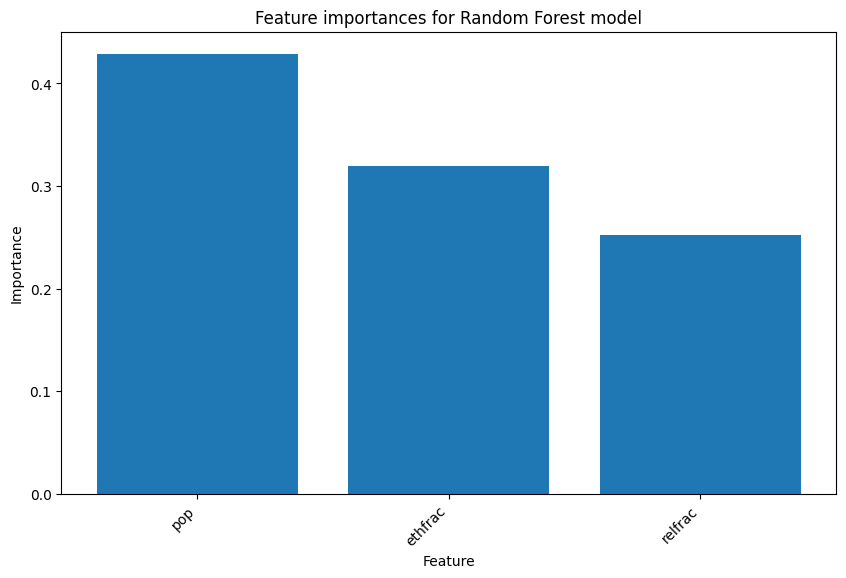

In [22]:
#feature importance for the model

import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_


sorted_indices = np.argsort(importances)[::-1]


print("Feature ranking:")

for i in sorted_indices:
    print(f"{i+1}. {X.columns[i]} ({importances[i]})")

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances for Random Forest model")
plt.show()


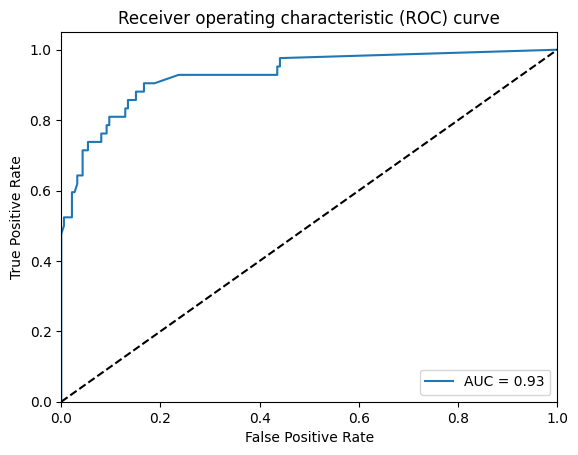

In [ ]:
#plot an roc curve for the model to assess how well it performs

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
X = conflict.drop(columns=['nonviolent'])
y = conflict[["ethwar", "pop", "ethfrac", "relfrac"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.7792625584083134e-21


In [ ]:
#MW try scaling features here

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = conflict.drop(columns=['violent'])
y = conflict[["ethwar", "pop", "ethfrac", "relfrac"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {}
for target_column in y.columns:
    model = LogisticRegression()
    model.fit(X_train, y_train[target_column])
    models[target_column] = model


predictions = {}
for target_column, model in models.items():
    predictions[target_column] = model.predict(X_test)

# Evaluate the model
for target_column in y.columns:
    accuracy = accuracy_score(y_test[target_column], predictions[target_column])
    print(f"Accuracy for {target_column}: {accuracy}")
    print(f"Classification Report for {target_column}:")
    print(classification_report(y_test[target_column], predictions[target_column]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = conflict.drop(columns=['violent'])
y = conflict[["ethwar", "ethfrac", "relfrac"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
column_values = conflict['prim_meth']
print (column_values)

17      0
31      0
40      0
56      0
88      0
       ..
2493    0
2533    0
2601    0
2680    0
2703    0
Name: prim_meth, Length: 87, dtype: int64


In [ ]:
value_counts = conflict['prim_meth'].value_counts()
print(value_counts)

prim_meth
0    79
1     8
Name: count, dtype: int64


In [ ]:
#Timelag attempt
from sklearn.model_selection import train_test_split

conflict = conflict.drop(columns=['year'])

X = conflict.drop(columns=['violent', 'nonviolent', 'conflict'])
y = conflict[['violent', 'nonviolent', 'conflict']]



# Split the data based on the year
#X_train = X[X['year'] < 1975]
#y_train = y[X['year'] < 1975]

#X_test = X[X['year'] >= 1975]
#y_test = y[X['year'] >= 1975]


#X_train = X_train.drop(columns=['year'])
#X_test = X_test.drop(columns=['year'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Time lag attempt, cont'd

lagged_vars = ['violent_lag1', 'nonviolent_lag1', 'conflict_lag1']

# Function to create train and test set by including only one specific lagged variable
def create_dataset_with_single_lagged_variable(X_train, X_test, include_var):

    X_train_modified = X_train.copy()
    X_test_modified = X_test.copy()


    vars_to_drop = [var for var in lagged_vars if var != include_var and var in lagged_vars]
    X_train_modified.drop(columns=vars_to_drop, inplace=True)
    X_test_modified.drop(columns=vars_to_drop, inplace=True)

    return X_train_modified, X_test_modified

In [ ]:
print(X_train_modified.columns)
print(X_test_modified.columns)

NameError: name 'X_train_modified' is not defined

In [ ]:
# Creating three train and test sets for features
X1_train, X1_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'violent_lag1')
X2_train, X2_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'nonviolent_lag1')
X3_train, X3_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'conflict_lag1')


KeyError: "['nonviolent_lag1', 'conflict_lag1'] not found in axis"

In [ ]:
# Creating three train and test sets for target variables
y1_train, y2_train, y3_train = y_train['violent'], y_train['nonviolent'], y_train['conflict']
y1_test, y2_test, y3_test = y_test['violent'], y_test['nonviolent'], y_test['conflict']

In [ ]:
##Scaling features

from sklearn.preprocessing import StandardScaler


scalers = [StandardScaler() for _ in range(5)]

# Scale each pair of datasets
X1_train_scaled = scalers[0].fit_transform(X1_train)
X1_test_scaled = scalers[0].transform(X1_test)

X2_train_scaled = scalers[1].fit_transform(X2_train)
X2_test_scaled = scalers[1].transform(X2_test)

X3_train_scaled = scalers[2].fit_transform(X3_train)
X3_test_scaled = scalers[2].transform(X3_test)

NameError: name 'X1_train' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split


X = conflict.drop(columns=['violent'])
y = conflict[["ethwar", "pop", "ethfrac", "relfrac"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize Random Forest classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to first dataset
clf1.fit(X_train, y_train)

# Get feature importance
importances1 = clf1.feature_importances_

# Generate feature names
feature_names1 = X_train.columns

# Sort feature importances in descending order
sorted_idx1 = np.argsort(importances1)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Violent Conflict")
plt.bar(range(len(importances1)), importances1[sorted_idx1], color="lightblue", align="center")
plt.xticks(range(len(importances1)), feature_names1[sorted_idx1], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
# Initialize Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to second dataset
clf2.fit(X2_train, y2_train)

# Get feature importance
importances2 = clf2.feature_importances_

# Generate feature names
feature_names2 = X2_train.columns


# Sort feature importances in descending order
sorted_idx2 = np.argsort(importances2)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Nonviolent Conflict")
plt.bar(range(len(importances2)), importances2[sorted_idx1], color="lightblue", align="center")
plt.xticks(range(len(importances2)), feature_names2[sorted_idx2], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Initialize Logistic Regression
logit_violent= LogisticRegression(max_iter=1000)

# Fit
logit_violent.fit(X1_train_scaled, y1_train)

# Make predictions
y1_pred = logit_violent.predict(X1_test_scaled)

# Calculate predicted probabilities for positive classs
y1_pred_proba = logit_violent.predict_proba(X1_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix
classes = ['No Violent Conflict', 'Violent Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y1_test,y1_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y1_test, y1_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y1_test, y1_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y1_test, y1_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'X1_train_scaled' is not defined

In [ ]:
# Initialize Logistic Regression
logit_nonviolent= LogisticRegression(max_iter=1000)

# Fit
logit_nonviolent.fit(X2_train_scaled, y2_train)

# Make predictions
y2_pred = logit_nonviolent.predict(X2_test_scaled)

# Calculate predicted probabilities
y2_pred_proba = logit_nonviolent.predict_proba(X2_test_scaled)[:, 1]


# confusion matrix
cm = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix
classes = ['No Nonviolent Conflict', 'Nonviolent Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y2_test,y2_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y2_test, y2_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y2_test, y2_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y2_test, y2_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Initialize Logistic Regression model
logit_conflict= LogisticRegression(max_iter=1000)

# Fit model
logit_conflict.fit(X3_train_scaled, y3_train)

# Make predictions
y3_pred = logit_violent.predict(X3_test_scaled)

# Calculate predicted probabilities for positive class
y3_pred_proba = logit_violent.predict_proba(X3_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix
classes = ['No Conflict', 'Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y3_test,y3_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y3_test, y3_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y3_test, y3_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y3_test, y3_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()